<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_1_0_9_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.943286,34.761011,0.118451,134.822748,134.661404,0.161344
1,0.0,1.0,68.182915,46.238076,-0.058036,124.362955,124.346332,0.016623
2,0.0,2.0,30.903943,32.846710,0.083762,73.834415,73.728162,0.106253
3,0.0,3.0,43.866498,83.963974,0.107642,137.938114,137.640015,0.298099
4,0.0,4.0,73.628150,92.398135,-0.056403,175.969882,175.801456,0.168426
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.695568,92.551531,-0.012248,126.234851,126.024149,0.210702
59996,999.0,56.0,27.758267,90.547128,-1.631730,126.673665,128.096077,-1.422411
59997,999.0,57.0,51.025558,23.749816,0.296608,85.071982,84.700330,0.371652
59998,999.0,58.0,60.460312,85.948835,1.744017,158.153165,156.297836,1.855328


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.943286  34.761011  0.118451  134.822748  134.661404  0.161344
      1.0    68.182915  46.238076 -0.058036  124.362955  124.346332  0.016623
      2.0    30.903943  32.846710  0.083762   73.834415   73.728162  0.106253
      3.0    43.866498  83.963974  0.107642  137.938114  137.640015  0.298099
      4.0    73.628150  92.398135 -0.056403  175.969882  175.801456  0.168426
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.695568  92.551531 -0.012248  126.234851  126.024149  0.210702
      56.0   27.758267  90.547128 -1.631730  126.673665  128.096077 -1.422411
      57.0   51.025558  23.749816  0.296608   85.071982   84.700330  0.371652
      58.0   60.460312  85.948835  1.744017  158.153165  156.297836  1.855328
      59.0   98.367963  35.952859  1.919523  146.240345  144.368501  1.871844

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.943286  34.761011  0.118451  134.822748  134.661404  0.161344
      1.0    68.182915  46.238076 -0.058036  124.362955  124.346332  0.016623
      2.0    30.903943  32.846710  0.083762   73.834415   73.728162  0.106253
      3.0    43.866498  83.963974  0.107642  137.938114  137.640015  0.298099
      4.0    73.628150  92.398135 -0.056403  175.969882  175.801456  0.168426
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.695568  92.551531 -0.012248  126.234851  126.024149  0.210702
      56.0   27.758267  90.547128 -1.631730  126.673665  128.096077 -1.422411
      57.0   51.025558  23.749816  0.296608   85.071982   84.700330  0.371652
      58.0   60.460312  85.948835  1.744017  158.153165  156.297836  1.855328
      59.0   98.367963  35.952859  1.919523  146.240345  144.368501  1.871844

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,89.943286,34.761011,0.118451,134.822748,134.661404,0.161344
1,0.0,1.0,68.182915,46.238076,-0.058036,124.362955,124.346332,0.016623
2,0.0,2.0,30.903943,32.846710,0.083762,73.834415,73.728162,0.106253
3,0.0,3.0,43.866498,83.963974,0.107642,137.938114,137.640015,0.298099
4,0.0,4.0,73.628150,92.398135,-0.056403,175.969882,175.801456,0.168426
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.695568,92.551531,-0.012248,126.234851,126.024149,0.210702
59996,999.0,56.0,27.758267,90.547128,-1.631730,126.673665,128.096077,-1.422411
59997,999.0,57.0,51.025558,23.749816,0.296608,85.071982,84.700330,0.371652
59998,999.0,58.0,60.460312,85.948835,1.744017,158.153165,156.297836,1.855328


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    89.943286  34.761011  0.118451  134.822748  134.661404  0.161344
      1.0    68.182915  46.238076 -0.058036  124.362955  124.346332  0.016623
      2.0    30.903943  32.846710  0.083762   73.834415   73.728162  0.106253
      3.0    43.866498  83.963974  0.107642  137.938114  137.640015  0.298099
      4.0    73.628150  92.398135 -0.056403  175.969882  175.801456  0.168426
...                ...        ...       ...         ...         ...       ...
999.0 55.0   23.695568  92.551531 -0.012248  126.234851  126.024149  0.210702
      56.0   27.758267  90.547128 -1.631730  126.673665  128.096077 -1.422411
      57.0   51.025558  23.749816  0.296608   85.071982   84.700330  0.371652
      58.0   60.460312  85.948835  1.744017  158.153165  156.297836  1.855328
      59.0   98.367963  35.952859  1.919523  146.240345  144.368501  1.871844

[60000 rows x 6 columns]

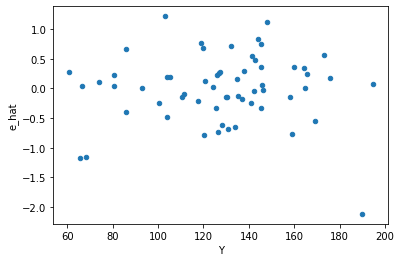

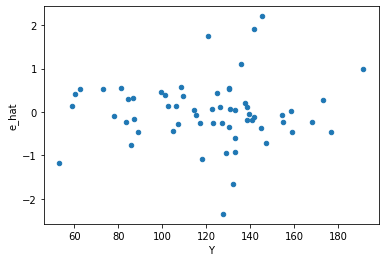

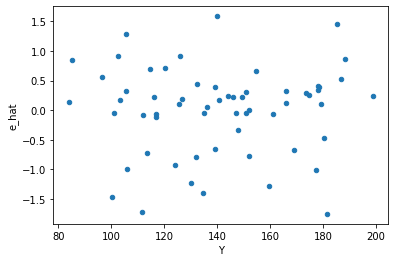

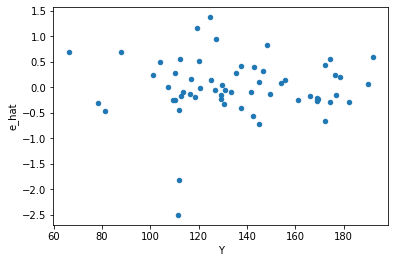

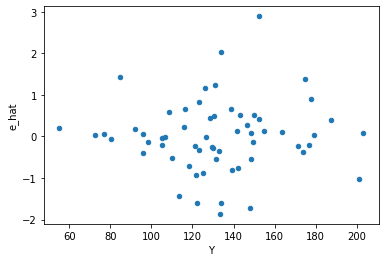

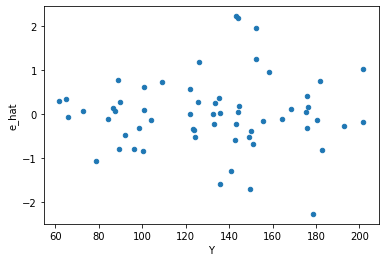

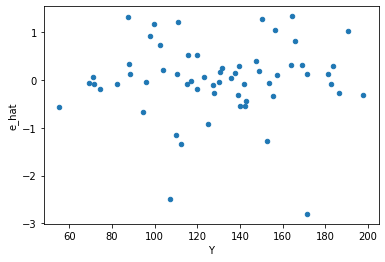

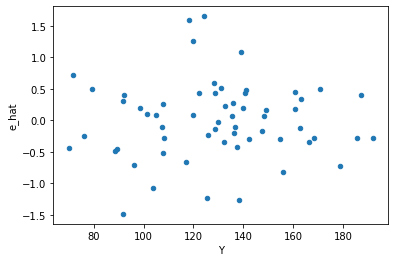

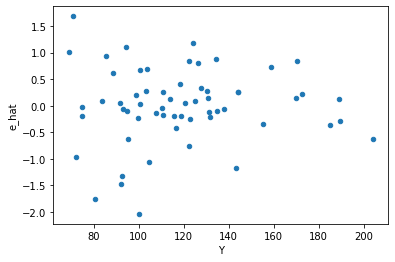

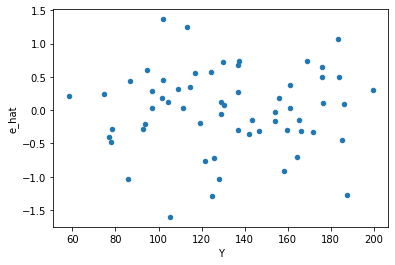

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,15.0,41.0,4.965538575506319,13.526083283318227,0.3310359050337546,0.32990447032483483,0.9965821390014948,0.9533552707855275,0.5233223646072362,0.47667763539276375,Reject001=1 : Homoscedasticity
7.0,34.0,22.0,8.557131504843296,12.407275371076379,0.251680338377744,0.5639670623216536,2.240806993334546,0.05025847286327201,0.974870763568364,0.025129236431636004,Reject001=1 : Homoscedasticity
13.0,24.0,32.0,12.208682774980556,18.13668103940163,0.5086951156241898,0.5667712824813009,1.1141669441544555,0.7645696950055574,0.6177151524972213,0.3822848475027787,Reject001=1 : Homoscedasticity
14.0,18.0,38.0,3.242442804089797,14.080520029072183,0.18013571133832207,0.37054000076505744,2.057004677263174,0.060944947944580274,0.9695275260277099,0.030472473972290137,Reject001=1 : Homoscedasticity
17.0,36.0,20.0,12.23504578965675,7.371237869080533,0.33986238304602084,0.3685618934540266,1.0844445041277768,0.868882294697733,0.5655588526511335,0.4344411473488665,Reject001=1 : Homoscedasticity
19.0,20.0,36.0,8.818867183804667,25.848486178182807,0.4409433591902333,0.7180135049495224,1.6283576790182581,0.1985751284102102,0.9007124357948949,0.0992875642051051,Reject001=1 : Homoscedasticity
22.0,22.0,34.0,12.492104810704465,23.277959498557983,0.567822945941112,0.6846458676046465,1.2057382895471258,0.6102112781206792,0.6948943609396604,0.3051056390603396,Reject001=1 : Homoscedasticity
23.0,33.0,23.0,17.280036567198238,17.45238948880256,0.5236374717332799,0.7587995429914156,1.449093282953436,0.3570325120316411,0.8214837439841794,0.17851625601582055,Reject001=1 : Homoscedasticity
24.0,35.0,21.0,21.149164717281597,16.09545966856214,0.6042618490651884,0.7664504604077209,1.268407829475654,0.5725617678747579,0.7137191160626211,0.28628088393737894,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,41.0,4.965538575506319,13.526083283318227,0.3310359050337546,0.32990447032483483,0.9965821390014948,0.9533552707855275,Reject001=1 : Homoscedasticity
1.0,37.0,19.0,27.68674503781007,4.440279744130859,0.7482904064272992,0.23369893390162413,0.3123104771814676,0.002388752162883454,Reject001=0 : Heteroscedasticity
2.0,30.0,26.0,20.232209128356597,11.64246917661795,0.67440697094522,0.44778727602376733,0.6639718972598516,0.2794055374444993,Reject001=1 : Homoscedasticity
3.0,33.0,23.0,16.978472167704915,3.6465297937947496,0.5144991565971186,0.15854477364324998,0.30815361232438193,0.0020662796480832007,Reject001=0 : Heteroscedasticity
4.0,22.0,34.0,17.39156853551832,23.508513304231265,0.7905258425235601,0.6914268618891548,0.8746416937894705,0.7539218707613781,Reject001=1 : Homoscedasticity
5.0,32.0,24.0,32.536878246605454,7.5340224564729255,1.0167774452064204,0.31391760235303856,0.3087377713117041,0.0021558725492006937,Reject001=0 : Heteroscedasticity
6.0,25.0,31.0,17.492143797672433,17.723281331430062,0.6996857519068973,0.5717187526267762,0.8171078960356637,0.6096209686680386,Reject001=1 : Homoscedasticity
7.0,34.0,22.0,8.557131504843296,12.407275371076379,0.251680338377744,0.5639670623216536,2.240806993334546,0.05025847286327201,Reject001=1 : Homoscedasticity
8.0,45.0,11.0,26.042443699005297,3.2277185214632524,0.5787209710890066,0.2934289564966593,0.507030108040668,0.1092140447994131,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      926
Reject001=0 : Heteroscedasticity     74
Name: Result_test, dtype: int64